<center> <h1> Python

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions <br>Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.

In [182]:
#import necessary libraries
import pandas as pd 
import json
from urllib.request import urlopen
import openpyxl
# store url link in url variable
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
# download contents of url using orlpoen , in response variable
response = urlopen(url)
# load the json data using json.loads
data_json = json.loads(response.read())
# finally use pd.json_normalize to create dataframe 
df = pd.json_normalize(data_json['pokemon'])


In [183]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [184]:
df.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution'],
      dtype='object')

## 1.Get all Pokemons whose spawn rate is less than 5%

In [185]:

df_new = pd.concat([df[df['spawn_chance']< 5]['name'] ,df[df['spawn_chance']< 5]['spawn_chance']] , axis = 1)

In [186]:
df_new

,name,spawn_chance
0,Bulbasaur,0.6900
1,Ivysaur,0.0420
2,Venusaur,0.0170
3,Charmander,0.2530
4,Charmeleon,0.0120
...,...,...
146,Dratini,0.3000
147,Dragonair,0.0200
148,Dragonite,0.0011
149,Mewtwo,0.0000


## Get all Pokemons that have less than 4 weaknesses

In [187]:
def less_than_four_weakness(x , name):
    return len(x)


In [188]:
ids = dict()
for i in range(0 , len(df['weaknesses'])):
    if len(df['weaknesses'][i])<4:
        ids[df['name'][i]] = len(df['weaknesses'][i])

In [189]:
len(ids)

102

In [190]:
ids

{'Charmander': 3,
 'Charmeleon': 3,
 'Charizard': 3,
 'Squirtle': 2,
 'Wartortle': 2,
 'Blastoise': 2,
 'Caterpie': 3,
 'Metapod': 3,
 'Pidgey': 2,
 'Pidgeotto': 2,
 'Pidgeot': 2,
 'Rattata': 1,
 'Raticate': 1,
 'Spearow': 2,
 'Fearow': 2,
 'Ekans': 2,
 'Arbok': 2,
 'Pikachu': 1,
 'Raichu': 1,
 'Sandshrew': 3,
 'Sandslash': 3,
 'Nidoran ♀ (Female)': 2,
 'Nidorina': 2,
 'Nidoran ♂ (Male)': 2,
 'Nidorino': 2,
 'Clefairy': 1,
 'Clefable': 1,
 'Vulpix': 3,
 'Ninetales': 3,
 'Jigglypuff': 1,
 'Wigglytuff': 1,
 'Diglett': 3,
 'Dugtrio': 3,
 'Meowth': 1,
 'Persian': 1,
 'Psyduck': 2,
 'Golduck': 2,
 'Mankey': 3,
 'Primeape': 3,
 'Growlithe': 3,
 'Arcanine': 3,
 'Poliwag': 2,
 'Poliwhirl': 2,
 'Abra': 3,
 'Kadabra': 3,
 'Alakazam': 3,
 'Machop': 3,
 'Machoke': 3,
 'Machamp': 3,
 'Tentacool': 3,
 'Tentacruel': 3,
 'Ponyta': 3,
 'Rapidash': 3,
 'Magnemite': 3,
 'Magneton': 3,
 "Farfetch'd": 2,
 'Doduo': 2,
 'Dodrio': 2,
 'Seel': 2,
 'Grimer': 2,
 'Muk': 2,
 'Shellder': 2,
 'Drowzee': 3,
 'Hypno'

## ● Get all Pokemons that have no multipliers at all

In [191]:
df[df['multipliers'].isnull()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,9,009,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,None,"[Electric, Grass]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
11,12,012,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,"[Bug, Flying]",1.09 m,32.0 kg,Caterpie Candy,NaN,Not in Eggs,0.0220,2.20,05:23,None,"[Fire, Electric, Ice, Flying, Rock]",NaN,"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
14,15,015,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,"[Bug, Poison]",0.99 m,29.5 kg,Weedle Candy,NaN,Not in Eggs,0.0510,5.10,04:50,None,"[Fire, Flying, Psychic, Rock]",NaN,"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,"[Electric, Flying]",1.60 m,52.6 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Ice, Rock]",NaN,NaN
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Water, Electric, Rock]",NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"[Dragon, Flying]",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,None,"[Ice, Rock, Dragon, Fairy]",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


##  Get all Pokemons that do not have more than 2 evolutions

In [192]:
df['prev_evolution'].fillna('0', inplace=True)
for i in range(0 , len(df['prev_evolution'])):
    if len(df['prev_evolution'][i]) <3:
        ids[df['name'][i]] = len(df['prev_evolution'][i])

In [193]:
ids

{'Charmander': 1,
 'Charmeleon': 1,
 'Charizard': 2,
 'Squirtle': 1,
 'Wartortle': 1,
 'Blastoise': 2,
 'Caterpie': 1,
 'Metapod': 1,
 'Pidgey': 1,
 'Pidgeotto': 1,
 'Pidgeot': 2,
 'Rattata': 1,
 'Raticate': 1,
 'Spearow': 1,
 'Fearow': 1,
 'Ekans': 1,
 'Arbok': 1,
 'Pikachu': 1,
 'Raichu': 1,
 'Sandshrew': 1,
 'Sandslash': 1,
 'Nidoran ♀ (Female)': 1,
 'Nidorina': 1,
 'Nidoran ♂ (Male)': 1,
 'Nidorino': 1,
 'Clefairy': 1,
 'Clefable': 1,
 'Vulpix': 1,
 'Ninetales': 1,
 'Jigglypuff': 1,
 'Wigglytuff': 1,
 'Diglett': 1,
 'Dugtrio': 1,
 'Meowth': 1,
 'Persian': 1,
 'Psyduck': 1,
 'Golduck': 1,
 'Mankey': 1,
 'Primeape': 1,
 'Growlithe': 1,
 'Arcanine': 1,
 'Poliwag': 1,
 'Poliwhirl': 1,
 'Abra': 1,
 'Kadabra': 1,
 'Alakazam': 2,
 'Machop': 1,
 'Machoke': 1,
 'Machamp': 2,
 'Tentacool': 1,
 'Tentacruel': 1,
 'Ponyta': 1,
 'Rapidash': 1,
 'Magnemite': 1,
 'Magneton': 1,
 "Farfetch'd": 1,
 'Doduo': 1,
 'Dodrio': 1,
 'Seel': 1,
 'Grimer': 1,
 'Muk': 1,
 'Shellder': 1,
 'Drowzee': 1,
 'Hypno'

In [194]:
len(ids)

151

## Get all Pokemons whose spawn time is less than 300 seconds.

In [195]:
df['spawn_time']

0      20:00
1      07:00
2      11:30
3      08:45
4      19:00
       ...  
146    06:41
147    11:57
148    23:38
149      N/A
150      N/A
Name: spawn_time, Length: 151, dtype: object

In [214]:
from datetime import timedelta, datetime
df.spawn_time.fillna('00:00', inplace= True)
df.spawn_time.replace('N/A', '00:00', inplace=True)
res = dict()
for i in range(0 , len(df['spawn_time'])):
    time_object = datetime.strptime(df['spawn_time'][i] , "%H:%M").time()
    total_seconds = (time_object.minute *60) + time_object.second
    if total_seconds < 300:
        res[df['name'][i]] = df['spawn_time'][i]
 

In [215]:
res

{'Bulbasaur': '20:00',
 'Ivysaur': '07:00',
 'Charmeleon': '19:00',
 'Wartortle': '07:02',
 'Pikachu': '04:00',
 'Nidorino': '09:02',
 'Rapidash': '04:00',
 'Magnemite': '04:04',
 'Dewgong': '06:04',
 'Ditto': '00:00',
 'Flareon': '07:02',
 'Omastar': '05:04',
 'Articuno': '00:00',
 'Zapdos': '00:00',
 'Moltres': '00:00',
 'Mewtwo': '00:00',
 'Mew': '00:00'}

<function matplotlib.pyplot.show(close=None, block=None)>

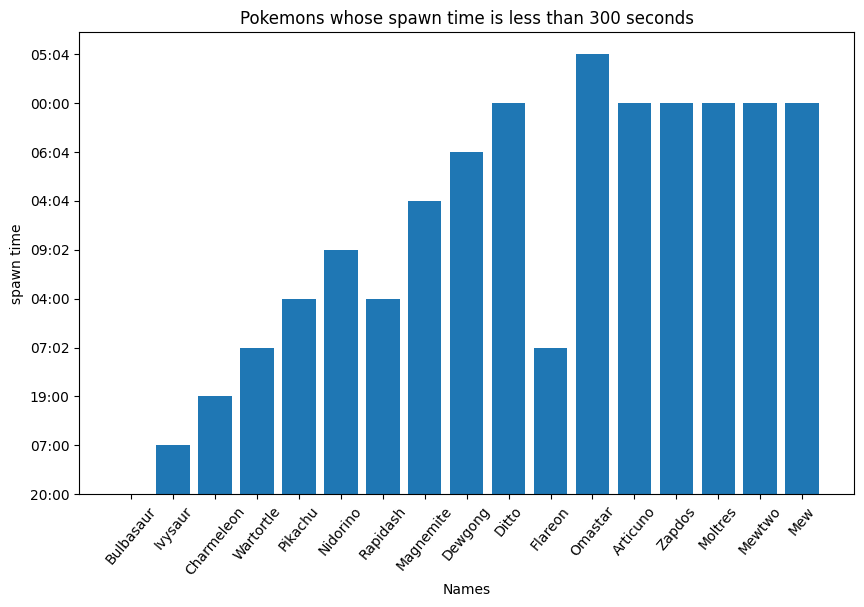

In [238]:
plt.figure(figsize=(10,6))
plt.bar(res.keys() , res.values() )
plt.xlabel('Names')
plt.ylabel('spawn time')
plt.title('Pokemons whose spawn time is less than 300 seconds')
plt.xticks(rotation= 50)
plt.show